# Lab: Images as Matrices — A Gentle Intro for COMP3057

**What you'll learn**
- Load **built‑in images** 🧩 (no downloads, no Lena)
- Display images 👁️ with **Matplotlib** and understand tensor shapes
- See raw pixel matrices 🔢, split/merge RGB channels
- Perform simple operations 🛠️ (crop, concat, grid, brightness, tiny convolution)

**Libraries**: `torch`, `torchvision`, `skimage`, `matplotlib`


## 0. Setup-Run this part on your own⚙️  

In [2]:
import torch
import torchvision
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

print("Setup complete! 🎉")
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

Setup complete! 🎉
PyTorch version: 2.8.0+cu126
Torchvision version: 0.23.0+cu126


## 1. Load Built‑in Images - Run this part on your own 🖼️
We'll use **`skimage.data`** which ships with classic example images.

In [3]:
# RGB example (uint8, shape [H, W, 3])
np_img_rgb = data.astronaut()

# Grayscale example (uint8, shape [H, W])
np_img_gray = data.camera()

print('astronaut (RGB) numpy shape:', np_img_rgb.shape, np_img_rgb.dtype)
print('camera (GRAY) numpy shape  :', np_img_gray.shape,  np_img_gray.dtype)

astronaut (RGB) numpy shape: (512, 512, 3) uint8
camera (GRAY) numpy shape  : (512, 512) uint8


## 2. Display with Matplotlib 👀
Use **`plt.imshow`**. For Torch tensors ([C, H, W]), remember to **permute** to [H, W, C].

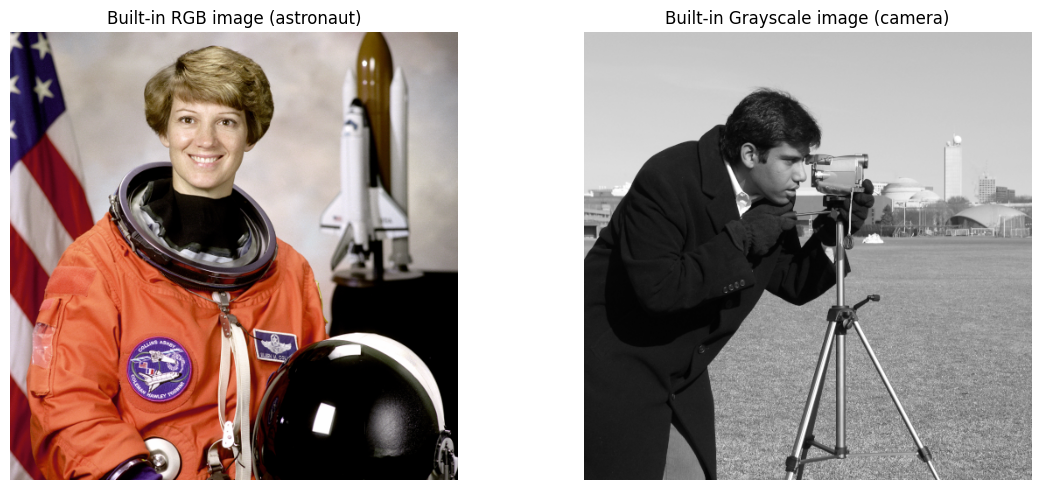

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(np_img_rgb)
plt.title('Built-in RGB image (astronaut)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np_img_gray, cmap='gray')
plt.title('Built-in Grayscale image (camera)')
plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Convert to Torch Tensors 🔄
- RGB numpy `[H, W, 3]` → Torch `[3, H, W]`
- GRAY numpy `[H, W]` → Torch `[1, H, W]`

In [5]:
img_rgb = torch.from_numpy(np_img_rgb).permute(2, 0, 1)  # [3, H, W]
img_gray = torch.from_numpy(np_img_gray).unsqueeze(0)     # [1, H, W]
print('RGB torch shape [C,H,W]:', img_rgb.shape, img_rgb.dtype)
print('GRAY torch shape [C,H,W]:', img_gray.shape, img_gray.dtype)

RGB torch shape [C,H,W]: torch.Size([3, 512, 512]) torch.uint8
GRAY torch shape [C,H,W]: torch.Size([1, 512, 512]) torch.uint8


In [ ]:
# Safety check: ensure dtype is uint8 for display (0-255)
if img_rgb.dtype != torch.uint8:
    img_rgb = torch.clamp(img_rgb, 0, 255).to(torch.uint8)
if img_gray.dtype != torch.uint8:
    img_gray = torch.clamp(img_gray, 0, 255).to(torch.uint8)

print("Data types converted to uint8 for proper display")

Data types converted to uint8 for proper display


## 4. 🧠 Exercise — *Image = Matrix* 📊


🎯**PURPOSE:**

This exercise demonstrates that images are fundamentally just matrices of numbers.

By creating and visualizing a random matrix, students will understand:

1. **CORE CONCEPT**: Every image is a 2D array of pixel values (0-255)
2. **VISUALIZATION**: How numbers translate to visual patterns
3. **MATRIX STRUCTURE**: Rows = image height, Columns = image width

**Goal**: See the direct connection between numerical data and visual representation.







In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Set the size of the matrix (image height and width) - smaller for complete visibility
rows = 80   # Image height (smaller to see full matrix)
cols = 80   # Image width

# Generate a random grayscale matrix with values between 0 and 255 (single channel)
random_matrix = np.random.randint(0, 256, (rows, cols), dtype=np.uint8)



### 4.1. Visualize the images you create

Complete grayscale matrix:
[[178 164  15 ...  52  74 177]
 [177 101  61 ...  98 220  92]
 [ 97 236 155 ... 229  70 119]
 ...
 [250  15 246 ... 215 125  77]
 [ 27  42 154 ... 106  93 205]
 [136  35 249 ... 210 153  22]]

Matrix shape: (80, 80)
Matrix data type: uint8


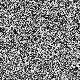

In [8]:
# Print the complete matrix structure
print("Complete grayscale matrix:")
print(random_matrix)

print(f"\nMatrix shape: {random_matrix.shape}")
print(f"Matrix data type: {random_matrix.dtype}")

# Display the matrix as an image using OpenCV
cv2_imshow(random_matrix)

## 5. RGB Channels — Split & Merge 🌈


###5.1. How RGB Channels work?

In [10]:
R, G, B = 255, 255, 0  # ← Change these numbers to try different colors!

# Create a small 5x5 image with this color
color_img = np.full((5, 5, 3), [R, G, B], dtype=np.uint8)

**Visualize the pixels you create**

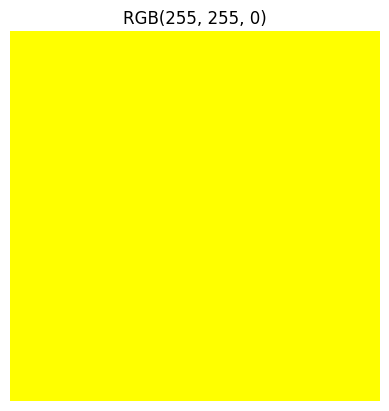

Current color: RGB(255, 255, 0)

🎯 Try changing the R, G, B values above!
• Pure Red: (255, 0, 0)
• Pure Green: (0, 255, 0)
• Pure Blue: (0, 0, 255)
• Yellow: (255, 255, 0)
• White: (255, 255, 255)


In [11]:
# Display the color
plt.imshow(color_img)
plt.title(f'RGB({R}, {G}, {B})')
plt.axis('off')
plt.show()

print(f"Current color: RGB({R}, {G}, {B})")
print("\n🎯 Try changing the R, G, B values above!")
print("• Pure Red: (255, 0, 0)")
print("• Pure Green: (0, 255, 0)")
print("• Pure Blue: (0, 0, 255)")
print("• Yellow: (255, 255, 0)")
print("• White: (255, 255, 255)")

###5.2. Visualize each channel as a grayscale image, then recompose.

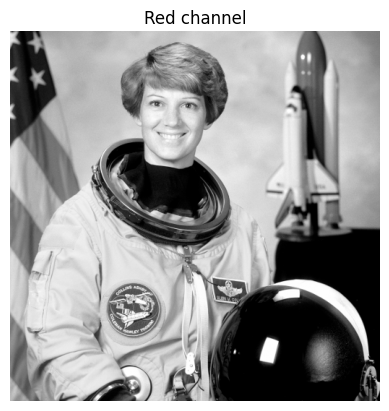

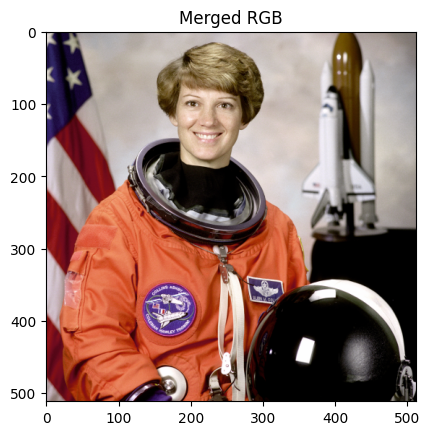

In [12]:
R, G, B = img_rgb[0], img_rgb[1], img_rgb[2]

# Show R channel
plt.imshow(R, cmap='gray')
plt.title('Red channel')
plt.axis('off')
plt.show()

# Merge back
merged = torch.stack([R, G, B])
plt.imshow(merged.permute(1, 2, 0))
plt.title('Merged RGB')
plt.show()

## 6. Simple Image Ops (Crop, Brightness, Concat) ✂️🔆➕

In [13]:
# Define brightness adjustment function
def adjust_brightness(img, delta):
    """Adjust brightness by adding delta and clipping to [0, 255]"""
    adjusted = img.float() + delta
    return torch.clamp(adjusted, 0, 255).to(torch.uint8)

# Crop operation - center crop
h, w = img_rgb.shape[1], img_rgb.shape[2]
cropped = img_rgb[:, h//4:3*h//4, w//4:3*w//4]  # center crop

# Brightness adjustments
bright = adjust_brightness(img_rgb, 60)
dark = adjust_brightness(img_rgb, -60)

**Display results**

In [ ]:
# Display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].imshow(img_rgb.permute(1,2,0))
axes[0,0].set_title('Original')
axes[0,0].axis('off')

axes[0,1].imshow(cropped.permute(1,2,0))
axes[0,1].set_title('Center Crop')
axes[0,1].axis('off')

axes[1,0].imshow(bright.permute(1,2,0))
axes[1,0].set_title('Brighter (+60)')
axes[1,0].axis('off')

axes[1,1].imshow(dark.permute(1,2,0))
axes[1,1].set_title('Darker (-60)')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

## 7: Image crop using Python Indexing

In [ ]:
C, H, W = img_gray.shape
top_left = img_gray[0:100, 0:100]  # [1, first_half_rows, first_half_cols]

**Results Display**

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_gray.squeeze(0), cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(top_left.squeeze(0), cmap='gray')
plt.title('Top-Left Quarter')
plt.axis('off')
plt.show()

## 8. Image Resolution Demonstration 📐

In [ ]:
# Set resolution - change these numbers to see the effect!
height = 2  # ← Try: 8, 16, 32, 64, 128
width = 2   # ← Try: 8, 16, 32, 64, 128

# Resize the camera image to this resolution
resized_img = cv2.resize(img_gray.squeeze(0).numpy(), (width, height))

**Display the resized image**

In [ ]:
# Display the resized image
plt.imshow(resized_img, cmap='gray')
plt.title(f'Resolution: {height}×{width} = {height*width} pixels')
plt.axis('off')
plt.show()

print(f"Current resolution: {height}×{width} pixels")
print(f"Total pixels: {height*width}")